In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

%matplotlib inline

In [3]:
df = pd.read_csv("/content/train.csv")


In [4]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [20]:
for i in df.columns:
  print(i,df[i].nunique())

battery_power 1094
blue 2
clock_speed 26
dual_sim 2
fc 20
four_g 2
int_memory 63
m_dep 10
mobile_wt 121
n_cores 8
pc 21
px_height 1137
px_width 1109
ram 1562
sc_h 15
sc_w 19
talk_time 19
three_g 2
touch_screen 2
wifi 2
price_range 4


In [61]:
cat=[]
for i in df.columns:
  if df[i].nunique() <=10:
    cat.append(i)

['blue',
 'dual_sim',
 'four_g',
 'm_dep',
 'n_cores',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

<Axes: >

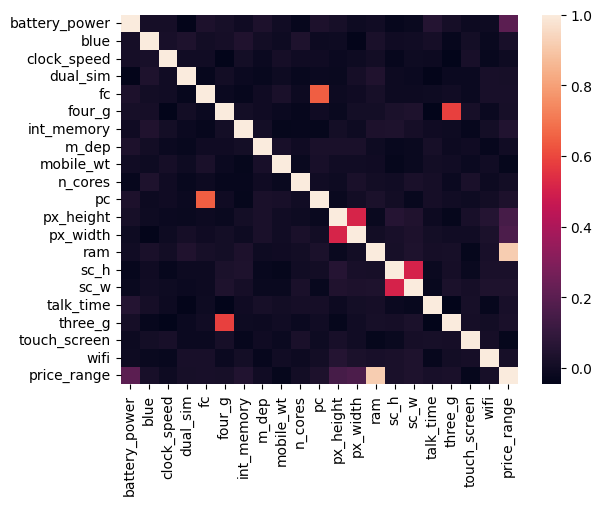

In [9]:
sns.heatmap(df.corr())

<Axes: xlabel='ram', ylabel='wifi'>

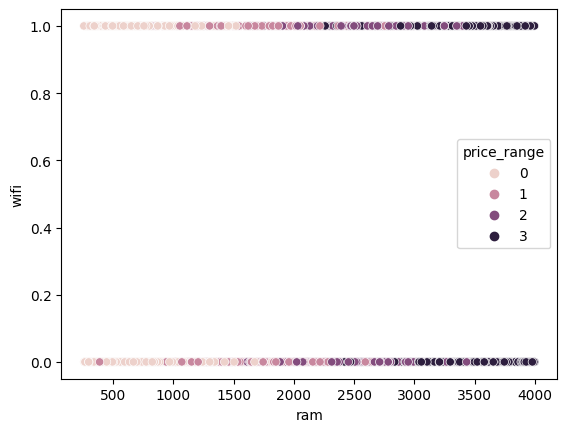

In [10]:
sns.scatterplot(x="ram",y="wifi",data=df,hue="price_range")

In [21]:
df.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [23]:
X = df.drop("price_range",axis=1)
y =df["price_range"]

In [28]:
X_train,X_test,y_train,y_test  = train_test_split(X,y ,test_size=0.2,random_state=818)
scale = StandardScaler()
X_train = scale.fit(X_train).transform(X_train)
X_test=scale.transform(X_test)

In [47]:
knn_range = []
for i in range(1,21):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  score=knn.score(X_test,y_test)
  knn_range.append(score)

Text(0.5, 0, 'k value')

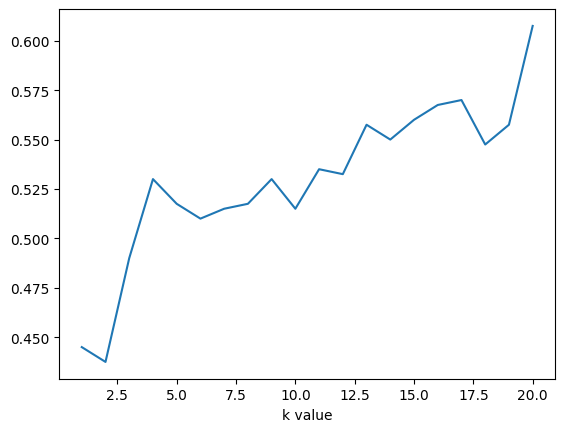

In [48]:
k_value=range(1,21)
plt.plot(k_value,knn_range)
plt.xlabel("k value")

In [53]:
knn=KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(y_pred)

[2 0 0 2 2 1 1 3 1 0 2 1 2 1 2 0 3 0 1 0 3 0 2 0 0 1 0 3 1 0 1 2 2 3 0 1 2
 2 1 1 3 3 2 3 2 0 1 1 0 2 1 1 2 3 0 1 0 2 3 0 0 2 1 1 1 1 1 3 2 1 2 2 1 3
 2 2 0 3 0 1 0 3 3 3 2 0 2 2 3 3 0 0 3 1 1 2 1 0 0 0 1 1 1 1 1 0 1 2 1 2 1
 0 2 0 1 0 1 1 3 2 1 2 0 0 2 1 2 0 2 0 1 1 0 3 0 0 0 2 0 0 1 2 3 1 3 0 2 1
 2 1 1 2 3 2 3 0 0 2 1 2 3 1 3 1 3 3 0 0 0 3 3 0 3 2 2 1 3 3 1 3 0 0 2 1 1
 0 3 2 0 2 0 3 3 3 3 0 0 3 2 3 3 3 1 1 1 2 2 2 2 1 1 3 3 0 3 1 2 2 1 3 2 0
 0 0 2 0 3 0 0 1 1 3 1 2 3 0 3 3 0 0 0 1 2 1 1 3 1 2 3 2 0 0 0 2 2 2 0 2 0
 2 1 1 0 1 0 2 2 1 0 1 2 1 2 2 0 1 2 3 0 1 0 0 1 1 2 3 2 2 3 2 2 3 1 1 0 1
 3 3 3 2 1 2 2 0 3 2 2 0 0 0 2 3 1 2 0 3 2 2 0 0 2 1 0 3 0 1 1 0 2 1 1 2 2
 2 2 1 1 2 0 3 2 2 0 1 1 1 2 2 2 3 1 2 3 0 3 3 3 1 2 2 2 1 0 1 0 1 3 3 0 0
 0 2 0 1 3 1 1 1 3 1 3 2 3 0 3 0 0 2 1 1 1 1 0 0 0 2 2 1 3 0]


In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       117
           1       0.45      0.48      0.46       102
           2       0.41      0.49      0.45        87
           3       0.79      0.67      0.72        94

    accuracy                           0.61       400
   macro avg       0.62      0.60      0.61       400
weighted avg       0.63      0.61      0.62       400

